# **ステージ3**
### **分類（決定木）と教師なし学習**



>**3つの異なる分析法をマスターせよ。**



1.   **分類(教師あり学習)**： 教師データがあるが予測したい変数がいくつかの離散カテゴリである場合の分析法。
2.   **主成分分析(教師なし学習)**: データについて詳しく調べたいけれども、その結果何が分 かるのか具体的な目標が定まっていない場合や、データに含まれている情報がはっきりしない場合の分析法。
3.   **K平均法(教師なし学習)**: データを適当なクラスタに分け、そのクラスタの平均を用いてデータがわかれるように調整させていく分析法。



---

## **インストラクション**

*   解答用紙をダウンロードし、決められた提出方法で提出して下さい。
*   全ての演習は、難易度の高い順に、最も簡単なものから最も難しいものへと慎重に配置
されています。
*   解答は不完全な形でも、何度でも提出可能です。
*   運営はQuestに関する一切の質問にお答えできません。質問があれば、Discord内で他の学習者に尋ねて下さい。
* DiscordでのコミュニケーションでQuestの解決が困難な場合は、ピアレビューをご活用ください。

---

# **Quest 1: 分類のための決定木モデルをつくる**

分類とは、予測したい変数がいくつかの離散カテゴリの場合にしようする分析法です。例として以下のような場合が挙げられます。



*   受験生が大学に合格するかどうかを、勉強時間や塾に通っているかどうかから予測する
*   ECサイトにてユーザーが会員登録してくれるかどうかを、サイト閲覧履歴から予測する
---


1. 分類のための以下のライブラリを読み込め。
*    numpy 
*  pandas 
*  DecisionTreeClassifier 
*   train_test_split 
*   accuracy_score 

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split as split
from sklearn.metrics import accuracy_score as ac

2. スパムメールについてのデータセット「data_sample4.csv」をsample4として読み込み、先頭5行を表示せよ。

データセット: https://drive.google.com/drive/folders/1Xx6ZHX9RhYn4qe295jS83KbdisDhPCo6?usp=sharing

In [2]:
sample4=pd.read_csv("data_sample4.csv")
sample4.head()

,Unnamed: 0,make,address,all,num3d,our,over,remove,internet,order,...,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type
0,1,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,spam
1,2,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,spam
2,3,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,spam
3,4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,spam
4,5,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,spam


3. メールがspamであれば1、そうでなければ0と処理する目的変数typeの列をデータセットに加え、先頭5行を表示し、列が加えられたことを確認せよ。

In [3]:
n=len(sample4)
i=0
a=[]
for i in range(n):
    if sample4["type"][i]=="spam":
        a.append(1)
    else:
        a.append(0)
sample4_2=sample4
sample4.assign(type=a).head()


,Unnamed: 0,make,address,all,num3d,our,over,remove,internet,order,...,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type
0,1,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,2,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,3,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,5,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
#これの方が綺麗だけど、spam とnonspam以外あるかもと思い・・・
sample4['type'].map({'spam': 1, 'nonspam': 0})

0       1
1       1
2       1
3       1
4       1
       ..
4596    0
4597    0
4598    0
4599    0
4600    0
Name: type, Length: 4601, dtype: int64

4. 目的変数yに先ほど追加したtypeの列を、説明変数Xにそれ以外の全ての列を代入せよ。確認のため、Xの先頭５行を表示させよ。

In [5]:
y=sample4["type"]
X=sample4_2.drop("type",axis=1)
X.head()

,Unnamed: 0,make,address,all,num3d,our,over,remove,internet,order,...,conference,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal
0,1,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,2,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,3,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,5,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


5. Xとyをそれぞれ7:3の学習データと検証データに分割し、全てのデータの形状を表示させよ。

In [6]:
X_train,X_test=split(X,train_size=0.7,test_size=0.3)
y_train,y_test=split(y,train_size=0.7,test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3220, 58)
(1381, 58)
(3220,)
(1381,)


# **Quest 2: 決定木で分析**

1. 分割（木）の最大の深さを3として、DecisionTreeClassifierで分類のためのインスタンスclfを作成せよ。

In [7]:
clf=DecisionTreeClassifier(max_depth = 3)

2. fit()メソッドを用いて、X_train, y＿trainのロジスティック回帰におけるパラメータ学習をせよ。

In [8]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

3. 学習させたパラメータを使い、predict()関数で予測結果を出力して確認せよ。

In [9]:
y_pred=clf.predict(X_test)
y_pred

array(['nonspam', 'nonspam', 'nonspam', ..., 'nonspam', 'nonspam',
       'nonspam'], dtype=object)

4. accuracy_score関数を用いて、予測の正確性を出力し、確認せよ。

In [10]:
ac(y_test, y_pred)

0.6002896451846488

#**Quest 3: 決定木モデルを可視化**

1. Google Colab上での可視化のために以下のコードを実行せよ。


```
!sudo apt install graphviz
!pip install dtreeviz
```



In [ ]:
!sudo apt install graphviz
!pip install dtreeviz

Password:

2. 決定木モデルの可視化のためのdtreevizライブラリをインポートせよ。

In [ ]:
from dtreeviz.trees import dtreeviz

3.  dtreevizを用いて決定木を可視化せよ。その際、目的変数の属名をbreed、説明変数(特徴量)の名前をX.columns、目的変数(カテゴリー)の名前をspamとno-spamに指定せよ。

In [ ]:
# 省略

# **Quest 4: ランダムフォレスト**

ランダムフォレスト（Random Forest）とは、
*   分類や回帰に使える機械学習の手法
*   決定木をたくさん作って多数決する（または平均を取る）ような手法 

1. RandomForestClassifierをインポート。matplotlib.pyplotをpltとしてインポートし、その際、以下の記述を加えよ。

`%matplotlib inline`

In [11]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline

2. 分類（木）の深さを3、木の数を10として、RandomForestClassifierでインスタンスclfを作成せよ。

In [12]:
clf=RandomForestClassifier(max_depth=3,n_estimators=10)

3. fit()メソッドを用いて、X_train, y＿trainをパラメータ学習をせよ。
   そして、学習させたパラメータを使い、predict()関数で予測し、accuracy_score()の結果を出力せよ。

In [13]:
clf.fit(X_train,y_train)
predy=clf.predict(X_test)
ac(predy,y_test)

0.6031860970311369

4. 分類（木）の深さを10、木の数を100として、RandomForestClassifierでインスタンスclfを再作成した後、accuracy_score()を出力し、正確率がどの程度変化したか確認せよ。

In [14]:
clf=RandomForestClassifier(max_depth=10,n_estimators=100)
clf.fit(X_train,y_train)
predX=clf.predict(X_test)
ac(predX,y_test)

0.5930485155684286

5.  下記のコードを実行して、分析結果の特徴量の重要度を可視化せよ。


```
features = np.array(X.columns)
indices = np.argsort(importances)

importances = clf.feature_importances_

plt.figure(figsize=(12,12))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.show()
```



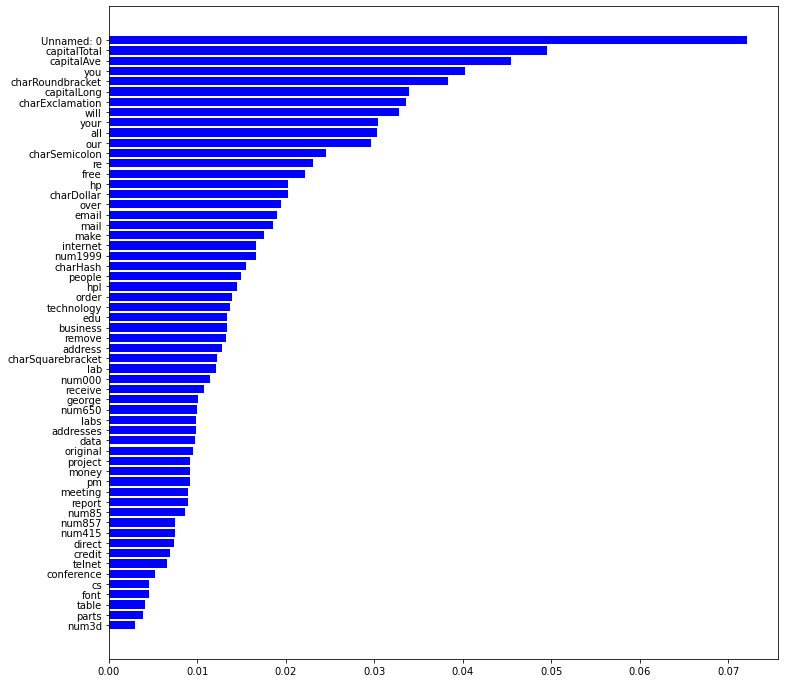

In [15]:
importances = clf.feature_importances_
features = np.array(X.columns)
indices = np.argsort(importances)
plt.figure(figsize=(12,12))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.show()

# **Quest 5: 主成分分析の実践**



> **教師なし学習：　正解情報を与えずにデータの特徴を学習する方法**


1.   **主成分分析**：　高次元のデータを低次元に圧縮する
2.   **K平均法**：　与えられたデータの中から、似ているもの同士をグループ化





---
主成分分析とは、データについて詳しく調べたいけれども、その結果何が分かるのか具体的な目標が定まっていない場合や、データに含まれている情報がはっきりしない場合の分析法です。例として以下のような場合が挙げられます。



*   顧客満足度調査やブランドイメージ調査、利用者調査などのアンケート結果の分析
*   企業ランキング、環境経営度調査、品質経営度調査など



---


1. 主成分分析用のライブラリであるPCAとStandardScalerをインポートせよ。

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

2. 企業の財務情報データである"data_sample5.csv"を読み込み、以下のカラムだけに絞り変数sample5に代入したのち、先頭５行を表示させよ。


```
"発行済み株式数", "BPS", "EPS", "純利益", "従業員数", "売上高"
```



In [17]:
sample5=pd.read_csv("data_sample5.csv",usecols=["発行済み株式数", "BPS", "EPS", "純利益", "従業員数", "売上高"])
sample5.head()

,発行済み株式数,BPS,EPS,純利益,従業員数,売上高
0,584000.0,593.71,234.64,63791000.0,48.0,7.345960e+08
1,2465700.0,239.15,63.07,150833000.0,100.0,2.488994e+09
2,1236700.0,567.16,71.14,78156000.0,27.0,7.316630e+08
3,800000.0,1150.47,391.48,274035000.0,40.0,6.376023e+09
4,4980000.0,669.67,175.52,708896000.0,117.0,1.394581e+10


3. StandardScaler()を用いて、sample5の全ての変数のスケールを合わせよ。

In [18]:
scaler = StandardScaler()
data_std = scaler.fit_transform(sample5)
data_std

array([[-3.54616388e-01, -3.95506261e-02,  1.62160395e+00,
        -1.03807598e-01, -5.97571082e-01, -6.02758505e-01],
       [-2.53865955e-01, -5.96789570e-01, -4.59485584e-01,
        -4.22445722e-02, -4.31965143e-01, -4.61055402e-01],
       [-3.19669368e-01, -8.12775382e-02, -3.61599051e-01,
        -9.36475270e-02, -6.64450404e-01, -6.02995404e-01],
       [-3.43051264e-01,  8.35472937e-01,  3.52402326e+00,
         4.48936812e-02, -6.23048919e-01, -1.47099236e-01],
       [-1.19244701e-01,  7.98307767e-02,  9.04497150e-01,
         3.52461968e-01, -3.77824740e-01,  4.64314245e-01],
       [-3.03483549e-01, -4.07093212e-01, -3.98715878e-01,
        -7.48225749e-02, -6.58080945e-01, -5.32426145e-01],
       [-6.37765957e-03,  1.19204237e-02,  6.36675978e-02,
         3.62520190e-01, -6.86743511e-01, -3.05051287e-01],
       [-2.97861614e-01, -2.71901160e-01,  1.27591022e-01,
        -2.22908019e-02,  3.16446315e-01, -3.54830374e-01],
       [-2.72161339e-01, -7.81598142e-01, -8.045

4. fit_transform()を用いて、sample5を二次元のデータに圧縮せよ。

In [19]:
embed2=PCA(n_components=2).fit_transform(data_std)

In [20]:
#5.二次元に圧縮した分析結果を散布図で可視化せよ。

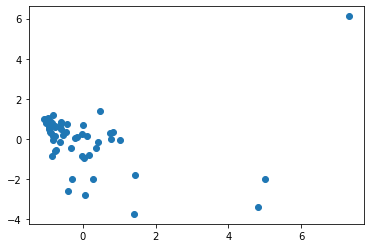

In [21]:
plt.scatter(embed2[:,0], embed2[:,1])

6. 分析結果の中で、極端な観測値(外れ値)となっている会社の会社名を変数outlierに代入し、それを表示させよ。

In [22]:
hazu1=sample5[embed2[:,0]>6]
hazu2=sample5[embed2[:,1]>6]
print(hazu1)
print(hazu2)
pd.read_csv("data_sample5.csv")


        発行済み株式数     BPS    EPS           純利益    従業員数           売上高
24  135339722.0  402.12 -60.61 -8.428000e+09  1140.0  3.576500e+10
        発行済み株式数     BPS    EPS           純利益    従業員数           売上高
24  135339722.0  402.12 -60.61 -8.428000e+09  1140.0  3.576500e+10


,Unnamed: 0,会社名,提出日,当年度開始日,発行済み株式数,BPS,EPS,純利益,従業員数,売上高,証券コード,業種,file_nm
0,E33868,アジャイルメディア・ネットワーク株式会社,2018-03-30,2017-01-01,584000.0,593.71,234.64,6.379100e+07,48.0,7.345960e+08,6573,サービス業,jpcrp030000-asr-001_E33868-000_2017-12-31_01_2...
1,E33858,株式会社和心,2018-03-30,2017-01-01,2465700.0,239.15,63.07,1.508330e+08,100.0,2.488994e+09,9271,小売業,jpcrp030000-asr-001_E33858-000_2017-12-31_01_2...
2,E33626,株式会社すららネット,2018-03-28,2017-01-01,1236700.0,567.16,71.14,7.815600e+07,27.0,7.316630e+08,3998,情報・通信業,jpcrp030000-asr-001_E33626-000_2017-12-31_01_2...
3,E33863,株式会社アズ企画設計,2018-05-30,2017-03-01,800000.0,1150.47,391.48,2.740350e+08,40.0,6.376023e+09,3490,不動産業,jpcrp030000-asr-001_E33863-000_2018-02-28_01_2...
4,E33819,株式会社フェイスネットワーク,2018-06-26,2017-04-01,4980000.0,669.67,175.52,7.088960e+08,117.0,1.394581e+10,3489,不動産業,jpcrp030000-asr-001_E33819-000_2018-03-31_01_2...
5,E34082,ログリー株式会社,2018-06-29,2017-04-01,1539000.0,359.85,68.08,1.047720e+08,29.0,1.605367e+09,6579,サービス業,jpcrp030000-asr-001_E34082-000_2018-03-31_01_2...
6,E33638,ＡＢホテル株式会社,2018-06-27,2017-04-01,7088000.0,626.46,106.20,7.231170e+08,20.0,4.420450e+09,6565,サービス業,jpcrp030000-asr-001_E33638-000_2018-03-31_01_2...
7,E34031,株式会社ＳＩＧ,2018-06-29,2017-04-01,1644000.0,445.87,111.47,1.790450e+08,335.0,3.804145e+09,4386,情報・通信業,jpcrp030000-asr-001_E34031-000_2018-03-31_01_2...
8,E33882,ブティックス株式会社,2018-06-27,2017-04-01,2124000.0,121.56,34.62,7.354200e+07,39.0,1.333177e+09,9272,小売業,jpcrp030000-asr-001_E33882-000_2018-03-31_01_2...
9,E33903,ヒューマン・アソシエイツ・ホールディングス株式会社,2018-06-26,2017-04-01,2782000.0,247.25,64.32,1.115880e+08,100.0,1.948142e+09,6575,サービス業,jpcrp030000-asr-001_E33903-000_2018-03-31_01_2...


In [23]:
outlier="株式会社メルカリ"
outlier

'株式会社メルカリ'

# **Quest 6: K平均法の実践**

K平均法は、データを適当なクラスタに分け、そのクラスタの平均を用いてデータがわかれるように調整させていく分析法。例として以下のような場合が挙げられます。



*   ECサイトの購買データから、ユーザーをいくつかのグループに分類する
*   文章の特徴から、さまざまな文章データをいくつかのグループに分類する

---

1. K平均法のライブラリであるKMeansと、標準化を行うライブラリであるStandardScalerをインポートし、データセットdata_sample5.csvを変数ksample5として再度読み込め。

In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
ksample5=pd.read_csv("data_sample5.csv")

2. ksample5を以下のカラムだけに絞った変数ksample5_targetに代入したせよ。
その後、専用のインスタンスを作り、fit_transform()関数でksample5_targetを標準化せし、変数data_stdに代入せよ。



```
"発行済み株式数", "BPS", "EPS", "純利益", "従業員数", "売上高"
```



In [25]:
ksample5_target=pd.read_csv("data_sample5.csv",usecols=["発行済み株式数", "BPS", "EPS", "純利益", "従業員数", "売上高"])
ksc=StandardScaler()
data_std=ksc.fit_transform(ksample5_target)

3. KMeansを用いてデータを3つのクラスタに分類したインスタンスを作成し、fit()関数にデータを渡しクラスタリングせよ。

In [26]:
pred=KMeans(n_clusters=3).fit(data_std)

4. 全てのデータのクラスター番号を表示して確認せよ。

In [27]:
ai=pred.labels_
ai

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0], dtype=int32)

5. 先ほど作ったksample5に、クラスター番号情報を追加せよ。

In [28]:
ksample5["label"]=ai

6. ksample5の先頭５行を表示させ、カラムにlabelが追加されたことを確認せよ。

In [29]:
ksample5.head()

,Unnamed: 0,会社名,提出日,当年度開始日,発行済み株式数,BPS,EPS,純利益,従業員数,売上高,証券コード,業種,file_nm,label
0,E33868,アジャイルメディア・ネットワーク株式会社,2018-03-30,2017-01-01,584000.0,593.71,234.64,63791000.0,48.0,7.345960e+08,6573,サービス業,jpcrp030000-asr-001_E33868-000_2017-12-31_01_2...,0
1,E33858,株式会社和心,2018-03-30,2017-01-01,2465700.0,239.15,63.07,150833000.0,100.0,2.488994e+09,9271,小売業,jpcrp030000-asr-001_E33858-000_2017-12-31_01_2...,0
2,E33626,株式会社すららネット,2018-03-28,2017-01-01,1236700.0,567.16,71.14,78156000.0,27.0,7.316630e+08,3998,情報・通信業,jpcrp030000-asr-001_E33626-000_2017-12-31_01_2...,0
3,E33863,株式会社アズ企画設計,2018-05-30,2017-03-01,800000.0,1150.47,391.48,274035000.0,40.0,6.376023e+09,3490,不動産業,jpcrp030000-asr-001_E33863-000_2018-02-28_01_2...,0
4,E33819,株式会社フェイスネットワーク,2018-06-26,2017-04-01,4980000.0,669.67,175.52,708896000.0,117.0,1.394581e+10,3489,不動産業,jpcrp030000-asr-001_E33819-000_2018-03-31_01_2...,0


7. plt.scatter()を用いてクラスター番号によって色分けされた散布図を描け。

In [34]:
#省略

TypeError: fit_transform() missing 1 required positional argument: 'X'

8. クラスター１の全ての会社名を表示させよ。

In [31]:
s=ksample5["label"]
t=ksample5["会社名"]
i=0

n=len(s)
for i in range(n):
    if s[i]==1:
        print(t[i])
    i=+1

株式会社メルカリ


9. クラスターごとの平均値を計算して、一つのDataFrameに格納し、表示させよ。
表示させたデータの中から、売上高が最も高いクラスター番号を出力せよ。

In [32]:
a=pd.DataFrame(ksample5[ksample5["label"]==0].mean())
b=pd.DataFrame(ksample5[ksample5["label"]==1].mean())
c=pd.DataFrame(ksample5[ksample5["label"]==2].mean())
df=pd.concat([a,b,c],axis=1)
print(df.set_axis(["0","1","2"],axis=1))
print("1")

                    0             1             2
発行済み株式数  4.097700e+06  1.353397e+08  2.398560e+07
BPS      5.963760e+02  4.021200e+02  1.312235e+03
EPS      1.019290e+02 -6.061000e+01  1.563050e+02
純利益      2.566410e+08 -8.428000e+09  3.331769e+09
従業員数     1.738654e+02  1.140000e+03  1.389500e+03
売上高      5.680945e+09  3.576500e+10  5.983673e+10
証券コード    5.541692e+03  4.385000e+03  7.187500e+03
label    0.000000e+00  1.000000e+00  2.000000e+00
1
